In [1]:
import numpy as np
from SimPEG import Mesh
from matplotlib.colors import LogNorm

In [2]:
mesh = Mesh.TensorMesh.readUBC("../data/synthetic_test/mesh1.msh")
rho_1 = mesh.readModelUBC("../data/synthetic_test/res1.res")
rho_2 = mesh.readModelUBC("../data/synthetic_test/res900.res")
rho_3 = mesh.readModelUBC("../data/synthetic_test/res7200.res")

In [3]:
rho_1.min()

0.4753882459404232

In [4]:
rho_1.max()

298.88079736348135

(<matplotlib.collections.QuadMesh at 0xb1cd3fdd8>,)

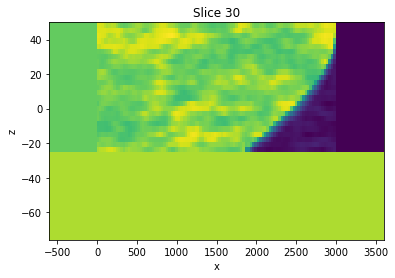

In [5]:
mesh.plotSlice(rho_1, normal='Y', pcolorOpts={'norm':LogNorm()})

In [6]:
mesh.hz.sum() / 3

42.0

In [7]:
hx = mesh.hx
hy = mesh.hy
hz = np.ones(120)* 3
x0 = (mesh.x0[0], mesh.x0[1], -300.)
mesh_new = Mesh.TensorMesh([hx, hy, hz], x0=x0)

In [53]:
i_start = 41
rho_background = 20.
rho_sand = 40
rho_clay = 10.
rho_1_new = np.ones(mesh_new.vnC, order='F') * rho_background
rho_1_new[:,:,i_start:i_start+42] = rho_1.reshape(mesh.vnC, order='F')[::-1,:,:]
rho_1_new = rho_1_new.flatten(order='F')
inds_layer_1 = np.logical_and(mesh_new.gridCC[:,2]>-30, mesh_new.gridCC[:,2]<0)
inds_layer_2 = np.logical_and(mesh_new.gridCC[:,2]>-50, mesh_new.gridCC[:,2]<=-30)
inds_layer_3 = mesh_new.gridCC[:,2]<-125
rho_1_new[inds_layer_1] = rho_sand
rho_1_new[inds_layer_2] = rho_clay
rho_1_new[inds_layer_3] = rho_clay
rho_1_new[mesh_new.gridCC[:,2]>0.] = np.nan

In [54]:
i_start = 41
rho_background = 20.
rho_sand = 40
rho_clay = 10.
rho_3_new = np.ones(mesh_new.vnC, order='F') * rho_background
rho_3_new[:,:,i_start:i_start+42] = rho_3.reshape(mesh.vnC, order='F')[::-1,:,:]
rho_3_new = rho_3_new.flatten(order='F')
inds_layer_1 = np.logical_and(mesh_new.gridCC[:,2]>-30, mesh_new.gridCC[:,2]<0)
inds_layer_2 = np.logical_and(mesh_new.gridCC[:,2]>-50, mesh_new.gridCC[:,2]<=-30)
inds_layer_3 = mesh_new.gridCC[:,2]<-125
rho_3_new[inds_layer_1] = rho_sand
rho_3_new[inds_layer_2] = rho_clay
rho_3_new[inds_layer_3] = rho_clay
rho_3_new[mesh_new.gridCC[:,2]>0.] = np.nan

In [55]:
mesh_new.write_vtk("time-lapse-synthetic.vtr", models={'rho_1':rho_1_new, 'rho_3':rho_3_new})

In [56]:
import matplotlib.pyplot as plt

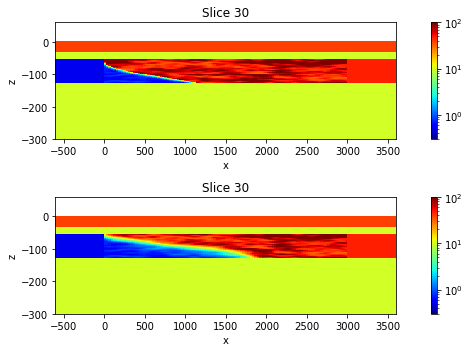

In [57]:
fig, axs = plt.subplots(2,1, figsize=(10, 5))
out1 = mesh_new.plotSlice(
    rho_1_new, normal='Y', pcolorOpts={'norm':LogNorm(), 'cmap':'jet'}, clim=(0.3, 100), 
    ax=axs[0]
)
out2 = mesh_new.plotSlice(
    rho_3_new, normal='Y', pcolorOpts={'norm':LogNorm(), 'cmap':'jet'}, clim=(0.3, 100), 
    ax=axs[1]
)
outs = [out1, out2]
for ii, ax in enumerate(axs):
    ax.set_aspect(4)
    plt.colorbar(outs[ii][0], orientation='vertical', ax=ax)
plt.tight_layout()
